In [14]:
import sklearn
from sklearn.datasets import load_boston
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

import pandas as pd
import numpy as np

In [18]:
boston = load_boston()
boston_df = pd.DataFrame(data = boston.data, columns=boston.feature_names)
boston_df['target'] = boston.target
boston_df.head()

data = boston_df.drop('target', axis=1, inplace=False)
target = boston_df['target']

rd = Ridge(alpha=10)

cvs = cross_val_score(rd, data, target, scoring='neg_mean_squared_error', cv=5)
rmse = np.sqrt(-1*cvs)

print(np.round(cvs,3), np.round(rmse,3))

[-11.422 -24.294 -28.144 -74.599 -28.517] [3.38  4.929 5.305 8.637 5.34 ]


* alpha값을 변경하면서 RMSE 측정

In [21]:
alphas = [0, 0.1, 1, 10, 100, 1000, 10000]

for alpha in alphas :
  rd = Ridge(alpha=alpha)
  cvs = cross_val_score(rd, data, target, scoring='neg_mean_squared_error', cv=5)
  rmse = np.mean(np.sqrt(-1 * cvs))
  print('alpha = {0} 일때 5 folds의 평균 RMSE : {1:.3f}'.format(alpha, rmse))

alpha = 0 일때 5 folds의 평균 RMSE : 5.829
alpha = 0.1 일때 5 folds의 평균 RMSE : 5.788
alpha = 1 일때 5 folds의 평균 RMSE : 5.653
alpha = 10 일때 5 folds의 평균 RMSE : 5.518
alpha = 100 일때 5 folds의 평균 RMSE : 5.330
alpha = 1000 일때 5 folds의 평균 RMSE : 5.598
alpha = 10000 일때 5 folds의 평균 RMSE : 6.430


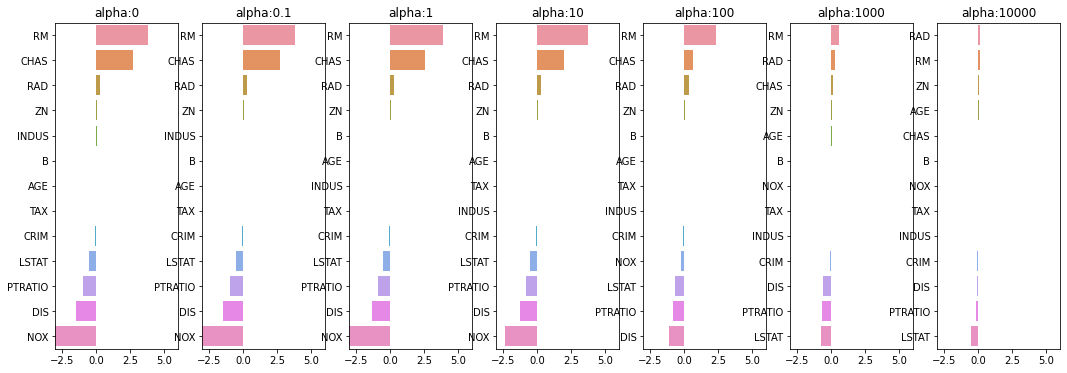

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=7)
coeff_df = pd.DataFrame()

for pos, alpha in enumerate(alphas):
  rd = Ridge(alpha = alpha)
  rd.fit(data, target)
  coeff = pd.Series(data = rd.coef_, index = data.columns)
  colname = 'alpha:'+str(alpha)
  coeff_df[colname] = coeff
  coeff = coeff.sort_values(ascending=False)
  axs[pos].set_title(colname)
  axs[pos].set_xlim(-3,6)
  sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

plt.show()

alpha 값에 따른 컬럼별 회귀계수 출력

In [26]:
ridge_alphas = [0 , 0.1 , 1 , 10 , 100, 1000, 10000]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100,alpha:1000,alpha:10000
RM,3.809865,3.818233,3.854000,3.702272,2.334536,0.568555,0.103753
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335,0.101449,0.015372
RAD,0.306049,0.303515,0.290142,0.279596,0.315358,0.310743,0.135454
ZN,0.046420,0.046572,0.047443,0.049579,0.054496,0.054378,0.057418
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826,-0.036336,-0.048535
B,0.009312,0.009368,0.009673,0.010037,0.009393,0.007990,0.009022
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212,0.030573,0.025549
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856,-0.016602,-0.013458
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202,-0.090768,-0.072837
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764,-0.763721,-0.519604
